<a href="https://colab.research.google.com/github/edmenciab733/odir/blob/main/odir_paso0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Lectura del dataset

In [ ]:
dir_data = '/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/data.xlsx'
dir_file_train = '/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/Training'
dir_file_test  = '/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/Testing'
crop_path_train =  r'/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/crop/training'
resize_folder_training =  r'/content/drive/MyDrive/Work/Oftalmologia/ODIR-5K/ODIR-5K/resize/training'

In [ ]:
import os
file_train = os.listdir(dir_file_train)
file_test =  os.listdir(dir_file_test)

In [ ]:
data = pd.read_excel(dir_data)

In [ ]:
data.head()

,id,age,sex,left-fundus,right-fundus,left-diagnostic,right-diagnostic,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
data[data.C ==  1].shape

(212, 15)

## Preparación de las imagenes


In [ ]:
def count_folder(folder):
  initial_count = 0
  for path in os.listdir(folder):
      if os.path.isfile(os.path.join(folder, path)):
          initial_count += 1
  return initial_count

In [ ]:
import cv2
import numpy as np
import os
class ImageCrop:
    def __init__(self, source_folder, destination_folder, file_name):
        self.source_folder = source_folder
        self.destination_folder = destination_folder
        self.file_name = file_name

    def remove_black_pixels(self):
        file = os.path.join(self.source_folder, self.file_name)
        image = cv2.imread(file)

        # Mask of coloured pixels.
        mask = image > 0

        # Coordinates of coloured pixels.
        coordinates = np.argwhere(mask)

        # Binding box of non-black pixels.
        x0, y0, s0 = coordinates.min(axis=0)
        x1, y1, s1 = coordinates.max(axis=0) + 1  # slices are exclusive at the top

        # Get the contents of the bounding box.
        cropped = image[x0:x1, y0:y1]
        # overwrite the same file
        file_cropped = os.path.join(self.destination_folder, self.file_name)
     
        cv2.imwrite(file_cropped, cropped)

In [ ]:
import PIL
import os
from PIL import Image

# This class allows you to resize and mirror an image of the dataset according to specific rules


class ImageResizer:
    def __init__(self, image_width, quality, source_folder, destination_folder, file_name, keep_aspect_ratio):
       
        self.image_width = image_width
        self.quality = quality
        self.source_folder = source_folder
        self.destination_folder= destination_folder
        self.file_name = file_name
        self.keep_aspect_ration = keep_aspect_ratio

    def run(self):
        """ Runs the image library using the constructor arguments.
        Args:
          No arguments are required.
        Returns:
          Saves the treated image into a separate folder.
        """
        # We load the original file, we resize it to a smaller width and correspondent height and
        # also mirror the image when we find a right eye image so they are all left eyes

        file = os.path.join(self.source_folder, self.file_name)
        img = Image.open(file)
        if self.keep_aspect_ration:
            # it will have the exact same width-to-height ratio as the original photo
            width_percentage = (self.image_width / float(img.size[0]))
            height_size = int((float(img.size[1]) * float(width_percentage)))
            img = img.resize((self.image_width, height_size), PIL.Image.ANTIALIAS)
        else:
            # This will force the image to be square
            img = img.resize((self.image_width, self.image_width), PIL.Image.ANTIALIAS)
        if "right" in self.file_name:
            
            img.transpose(Image.FLIP_LEFT_RIGHT).save(os.path.join(self.destination_folder, self.file_name), optimize=True, quality=self.quality)
        else:
            img.save(os.path.join(self.destination_folder, self.file_name), optimize=True, quality=self.quality)
       

In [ ]:
crop_image = False
print(count_folder(dir_file_train))
print(count_folder(crop_path_train))

7000
6994


In [ ]:
from os import listdir
from os.path import isfile, join
# Note that this will alter the current training image set folder
def process_all_images():
    files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
    for file in files:
       
        ImageCrop(source_folder, destination_folder, file).remove_black_pixels()

source_folder = dir_file_train
destination_folder = crop_path_train
# create logger
if crop_image == True:
  process_all_images()

In [ ]:
resize_image = False

In [ ]:
from os import listdir
from os.path import isfile, join
# This default job to 224px images, will shrink the dataset from 1,439,776,768 bytes
# to 116,813,824 bytes 91.8% size reduction
def process_all_images():
    files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
    for file in files:
        ImageResizer(image_width, quality, source_folder, destination_folder, file, keep_aspect_ratio).run()


if resize_image == True:
    # Set the base width of the image to 200 pixels
    image_width = 224
    keep_aspect_ratio = False
    # set the quality of the resultant jpeg to 100%
    quality = 100
    source_folder = crop_path_train
    destination_folder = resize_folder_training
    # create logger
    process_all_images()

In [ ]:
count_folder(resize_folder_training)

6994

## Limpieza de datos

In [ ]:
classes = list(data.columns[7:15])
data['Patient Labels'] = data.apply(lambda x:[class_ for class_ in classes if x[class_]==1], axis=1)
data.head()

,id,age,sex,left-fundus,right-fundus,left-diagnostic,right-diagnostic,N,D,G,C,A,H,M,O,Patient Labels
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,[C]
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,[N]
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,"[D, O]"
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,[O]
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,"[D, O]"


In [ ]:
col_names = ['Image', 'Keywords', 'Age', 'Sex', 'Patient Labels', 'ID']

# DataFrame for left-eye images
eyes_L = data[['left-fundus', 'left-diagnostic', 'age', 'sex', 'Patient Labels', 'id']]
eyes_L.columns = col_names

# DataFrame for right-eye images
eyes_R = data[['right-fundus', 'right-diagnostic', 'age', 'sex', 'Patient Labels', 'id']]
eyes_R.columns = col_names

# DataFrame for left-eye and right-eye images combined
eyes_df = pd.concat([eyes_L, eyes_R], axis=0)

eyes_df.head()

,Image,Keywords,Age,Sex,Patient Labels,ID
0,0_left.jpg,cataract,69,Female,[C],0
1,1_left.jpg,normal fundus,57,Male,[N],1
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,42,Male,"[D, O]",2
3,3_left.jpg,normal fundus,66,Male,[O],3
4,4_left.jpg,macular epiretinal membrane,53,Male,"[D, O]",4


### keywords otros

In [ ]:
O_keywords = [
    'macular epiretinal membrane',
    'epiretinal membrane',
    'drusen',
    #'lens dust',
    'myelinated nerve fibers',
    'laser spot',
    'vitreous degeneration',
    'refractive media opacity',
    'spotted membranous change',
    'tessellated fundus',
    'maculopathy',
    'chorioretinal atrophy',
    'branch retinal vein occlusion',
    'retinal pigmentation',
    'white vessel',
    'post retinal laser surgery',
    'epiretinal membrane over the macula',
    'retinitis pigmentosa',
    'central retinal vein occlusion',
    'optic disc edema',
    'post laser photocoagulation',
    'retinochoroidal coloboma',
    'atrophic change',
    'optic nerve atrophy',
    'old branch retinal vein occlusion',
    'depigmentation of the retinal pigment epithelium',
    'chorioretinal atrophy with pigmentation proliferation',
    'central retinal artery occlusion',
    'old chorioretinopathy',
    'pigment epithelium proliferation',
    'retina fold',
    'abnormal pigment ',
    'idiopathic choroidal neovascularization',
    'branch retinal artery occlusion',
    'vessel tortuosity',
    'pigmentation disorder',
    'rhegmatogenous retinal detachment',
    'macular hole',
    'morning glory syndrome',
    'atrophy',
    #'low image quality',
    'arteriosclerosis',
    'asteroid hyalosis',
    'congenital choroidal coloboma',
    'macular coloboma',
    'optic discitis',
    'oval yellow-white atrophy',
    'wedge-shaped change',
    'wedge white line change',
    'retinal artery macroaneurysm',
    'retinal vascular sheathing',
    'suspected abnormal color of  optic disc',
    'suspected retinal vascular sheathing',
    'suspected retinitis pigmentosa',
    'silicone oil eye',
    'fundus laser photocoagulation spots',
    'glial remnants anterior to the optic disc',
    'intraretinal microvascular abnormality'
    

]

### Generación de Etiquetas

In [ ]:
def generate_eye_labels(keywords, patient_labels):
    eye_labels = []
    
    if 'normal fundus' in keywords:
        eye_labels.append('N')
        #if list(set(keywords.replace('，', ',').split(',')))==['normal fundus']: # there were two images, for which 'normal fundus' keyphrase was duplicated
            
        #    eye_labels.append('N+') # healthy fundus without any caveats (like lens dust or low image quality)
        #    return eye_labels # in this case we know that there are no other keywords, so we can already quit the function and return the list
        #else:
           
        #    eye_labels.append('N-') # healthy fundus but with some caveats
    if 'lens dust' in keywords:
        eye_labels.append('LD') # lens dust
    if 'low image quality' in keywords:
        eye_labels.append('LIQ') # low image quality
    if 'D' in patient_labels and ('proliferative retinopathy' in keywords or 'diabetic' in keywords):
        eye_labels.append('D') # diabetes
    if 'suspected glaucoma' in keywords:
        eye_labels.append('SG') # suspected glaucoma (it may be real glaucoma or may not)
    elif 'glaucoma' in keywords:
        eye_labels.append('G') # glaucoma
    if 'cataract' in keywords:
        eye_labels.append('C') # cataract
    if 'age-related' in keywords:
        eye_labels.append('A') # AMD
    if 'hypertensi' in keywords:
        eye_labels.append('H') # hypertension
    if 'myopi' in keywords:
        eye_labels.append('M') # myopia
    if 'O' in patient_labels and (any(O_keyword in keywords for O_keyword in O_keywords)):
        eye_labels.append('O') # other (anything else)
    return eye_labels



In [ ]:
eyes_df['Eye Labels'] = eyes_df.apply(lambda x: generate_eye_labels(x['Keywords'], x['Patient Labels']), axis=1)
eyes_df.head()

,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant
0,0_left.jpg,cataract,69,Female,[C],0,[C],C,1
1,1_left.jpg,normal fundus,57,Male,[N],1,[N],"N,N+",2
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,42,Male,"[D, O]",2,"[D, O]","D,O",2
3,3_left.jpg,normal fundus,66,Male,[O],3,[N],"N,N+",2
4,4_left.jpg,macular epiretinal membrane,53,Male,"[D, O]",4,[O],O,1


## Análisis de etiquetas

### Paso 1

In [ ]:
from collections import Counter
c = Counter()
for eye_label in eyes_df['Eye Labels']:
    c[tuple(eye_label)] +=1 
c

Counter({('C',): 263,
         ('N',): 2818,
         ('D', 'O'): 247,
         ('O',): 814,
         ('D',): 1392,
         ('D', 'H'): 67,
         ('M',): 240,
         ('H',): 104,
         ('G', 'O'): 20,
         ('LD', 'O'): 58,
         ('A',): 238,
         ('N', 'LD'): 277,
         ('D', 'C'): 13,
         ('SG',): 18,
         ('G',): 202,
         ('G', 'A'): 14,
         ('LD', 'D'): 11,
         ('D', 'A'): 16,
         ('H', 'O'): 6,
         ('SG', 'H'): 2,
         ('LIQ', 'O'): 1,
         ('LD', 'D', 'O'): 9,
         ('LD', 'C', 'O'): 1,
         (): 9,
         ('LD', 'C'): 24,
         ('SG', 'C'): 2,
         ('A', 'M'): 2,
         ('D', 'SG'): 11,
         ('A', 'O'): 4,
         ('N', 'LD', 'O'): 3,
         ('A', 'H'): 5,
         ('G', 'M'): 8,
         ('D', 'G'): 18,
         ('G', 'H'): 6,
         ('SG', 'O'): 9,
         ('D', 'G', 'O'): 3,
         ('LD', 'G'): 8,
         ('M', 'O'): 4,
         ('LD', 'M'): 6,
         ('D', 'M'): 8,
         ('LD',

In [ ]:
def extract_dataframe(criteria=['C'], n_max=0, shuffle=True, df=eyes_df):
    if type(criteria)!=type(list()):
        criteria = [criteria]
    disease_criteria = [criterion for criterion in criteria if criterion!='Male' and criterion!='Female']
    
    if disease_criteria==[]:
        df['extract'] = 1
    else:
        df['extract'] = df['Eye Labels'].apply(lambda x: 1 if all(criterion in x for criterion in disease_criteria) else 0)
    
    if 'Male' in criteria:
        df['extract'] = df['extract'] * df['Sex'].apply(lambda x: 1 if x=='Male' else 0 )
    elif 'Female' in criteria:
        df['extract'] = df['extract'] * df['Sex'].apply(lambda x: 1 if x=='Female' else 0 )
        
    extract_df = df.query(' `extract` == 1 ')
    extract_df.drop('extract', axis=1, inplace=True)
    df.drop('extract', axis=1, inplace=True)
    if shuffle:
        extract_df = extract_df.sample(frac=1)
    extract_df.reset_index(drop=True, inplace=True)
    if n_max!=0:
        extract_df = extract_df.iloc[:n_max, :]
    
    return extract_df

In [ ]:
males_with_cataract_df = extract_dataframe(['C', 'Male'])
print(males_with_cataract_df['Eye Labels'].value_counts()) # Distribution of eye labels in males with cataract
print(males_with_cataract_df['Patient Labels'].value_counts()) # Distribution of patient labels in males with cataract
print(males_with_cataract_df['Sex'].value_counts()) # Distribution of sexes in males with cataract - unsurprisingly boring
males_with_cataract_df.head()

[C]          113
[LD, C]        9
[D, C]         7
[C, H]         2
[D, C, O]      2
[C, O]         1
Name: Eye Labels, dtype: int64
[C]          103
[D, C]        17
[C, O]         6
[D, C, O]      5
[C, H]         2
[G, C]         1
Name: Patient Labels, dtype: int64
Male    134
Name: Sex, dtype: int64


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant
0,750_left.jpg,cataract,56,Male,"[D, C]",750,[C],C,1
1,354_right.jpg,cataract,65,Male,[C],354,[C],C,1
2,1968_left.jpg,cataract，lens dust,52,Male,"[C, O]",1968,"[LD, C]","LD,C",2
3,1435_left.jpg,cataract,79,Male,[C],1435,[C],C,1
4,2146_right.jpg,cataract,87,Male,[C],2146,[C],C,1


In [ ]:
all_eye_labels = [*classes, 'N-', 'N+','LD','LIQ','SG']
for criterion in [*all_eye_labels, 'Male', 'Female']:
    print(criterion, extract_dataframe(criterion).shape[0])

N 3098
D 1801
G 282
C 313
A 280
H 193
M 268
O 1190
N- 0
N+ 0
LD 405
LIQ 21
SG 44
Male 3770
Female 3230


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
eyes_df['label'] = [','.join(map(str, l)) for l in eyes_df['Eye Labels']]

In [ ]:
eyes_df['enfer_cant'] = [ len(l) for l in eyes_df['Eye Labels']]

In [ ]:
eyes_defined_data = eyes_df[eyes_df.enfer_cant == 1]

In [ ]:
eyes_defined_data.head()

,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant
0,0_left.jpg,cataract,69,Female,[C],0,[C],C,1
1,1_left.jpg,normal fundus,57,Male,[N],1,[N],N,1
3,3_left.jpg,normal fundus,66,Male,[O],3,[N],N,1
4,4_left.jpg,macular epiretinal membrane,53,Male,"[D, O]",4,[O],O,1
5,5_left.jpg,moderate non proliferative retinopathy,50,Female,[D],5,[D],D,1


In [ ]:
paths = []
folder = []
for index, row in eyes_defined_data.iterrows():
    path = "{}/{}".format(resize_folder_training,row['Image'])
    isExist = os.path.exists(path)
    if isExist:
     paths.append(path) 
     folder.append('train')
    else:
       paths.append("{}/{}".format(dir_file_test,row['Image'])) 
       folder.append('test')

In [ ]:
eyes_defined_data['path'] = paths
eyes_defined_data['folder'] = folder

<ipython-input-36-bdc9359dec45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyes_defined_data['path'] = paths
<ipython-input-36-bdc9359dec45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyes_defined_data['folder'] = folder


In [ ]:
eyes_defined_data = eyes_defined_data[ eyes_defined_data.folder != 'test']

### Paso 2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread(eyes_defined_data.iloc[1]['path'])

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
eyes_defined_data.head()

,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant,path,folder
0,0_left.jpg,cataract,69,Female,[C],0,[C],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train
1,1_left.jpg,normal fundus,57,Male,[N],1,[N],N,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train
3,3_left.jpg,normal fundus,66,Male,[O],3,[N],N,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train
4,4_left.jpg,macular epiretinal membrane,53,Male,"[D, O]",4,[O],O,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train
5,5_left.jpg,moderate non proliferative retinopathy,50,Female,[D],5,[D],D,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train


In [ ]:
eyes_defined_data.to_csv('archivo_final.csv', index=False)  

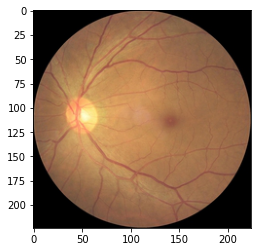

In [ ]:
imgplot = plt.imshow(img)

In [ ]:
from sklearn import preprocessing

In [ ]:
label_list = list(eyes_defined_data['label'])

In [ ]:
le = preprocessing.LabelEncoder()
le = le.fit(label_list)
list(le.classes_)

['A', 'C', 'D', 'G', 'H', 'LD', 'LIQ', 'M', 'O', 'SG']

In [ ]:
eyes_defined_data['label_numeric'] = list(le.transform(label_list))
eyes_defined_data.head()

,Image,Keywords,Age,Sex,Patient Labels,ID,Eye Labels,label,enfer_cant,path,folder,label_numeric
0,0_left.jpg,cataract,69,Female,[C],0,[C],C,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,1
4,4_left.jpg,macular epiretinal membrane,53,Male,"[D, O]",4,[O],O,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,8
5,5_left.jpg,moderate non proliferative retinopathy,50,Female,[D],5,[D],D,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,2
6,6_left.jpg,macular epiretinal membrane,60,Male,"[D, O]",6,[O],O,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,8
7,7_left.jpg,drusen,60,Female,"[D, O]",7,[O],O,1,/content/drive/MyDrive/Work/Oftalmologia/ODIR-...,train,8


# Modelo